In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("D:\project-II\smart_bin_dataset.csv")
df.head()

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\admin\AppData\Local\Temp\ipykernel_12812\1685603042.py:1: SyntaxWarning: invalid escape sequence '\p'
  df = pd.read_csv("D:\project-II\smart_bin_dataset.csv")


,Bin_ID,Timestamp,Location,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full
0,1,01-07-2025 00:00,Area_7,Residential,24,80,Rainy,1
1,1,01-07-2025 06:00,Area_7,Residential,30,93,Rainy,1
2,1,01-07-2025 12:00,Area_7,Residential,36,100,Sunny,1
3,1,01-07-2025 18:00,Area_7,Residential,42,100,Sunny,1
4,2,01-07-2025 00:00,Area_3,Market,47,100,Rainy,1


In [3]:
df.shape

(6000, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Bin_ID                           6000 non-null   int64 
 1   Timestamp                        6000 non-null   object
 2   Location                         6000 non-null   object
 3   Area_Type                        6000 non-null   object
 4   Time_Since_Last_Collection(hrs)  6000 non-null   int64 
 5   Fill_Level(%)                    6000 non-null   int64 
 6   Weather                          6000 non-null   object
 7   Is_Full                          6000 non-null   int64 
dtypes: int64(4), object(4)
memory usage: 375.1+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Bin_ID,6000.0,25.500000,14.432072,1.0,13.00,25.5,38.0,50.0
Time_Since_Last_Collection(hrs),6000.0,39.358000,12.419321,12.0,30.00,39.0,48.0,66.0
Fill_Level(%),6000.0,91.463833,15.960957,16.0,89.75,100.0,100.0,100.0
Is_Full,6000.0,0.820500,0.383802,0.0,1.00,1.0,1.0,1.0


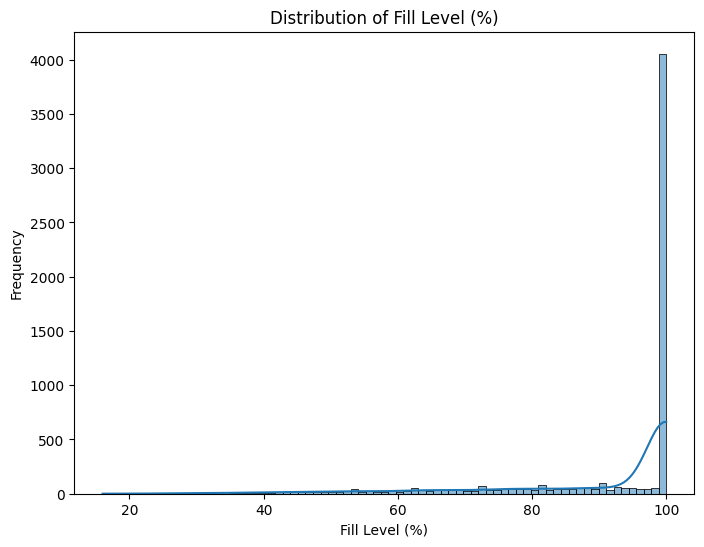

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of Fill_Level(%)
plt.figure(figsize=(8, 6))
sns.histplot(df['Fill_Level(%)'], kde=True)
plt.title('Distribution of Fill Level (%)')
plt.xlabel('Fill Level (%)')
plt.ylabel('Frequency')
plt.show()


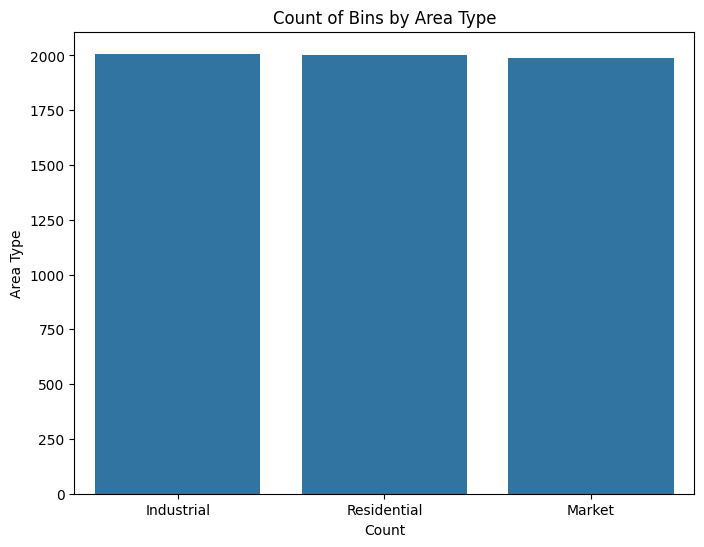

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Area_Type', data=df, order = df['Area_Type'].value_counts().index)
plt.title('Count of Bins by Area Type')
plt.xlabel('Count')
plt.ylabel('Area Type')
plt.show()

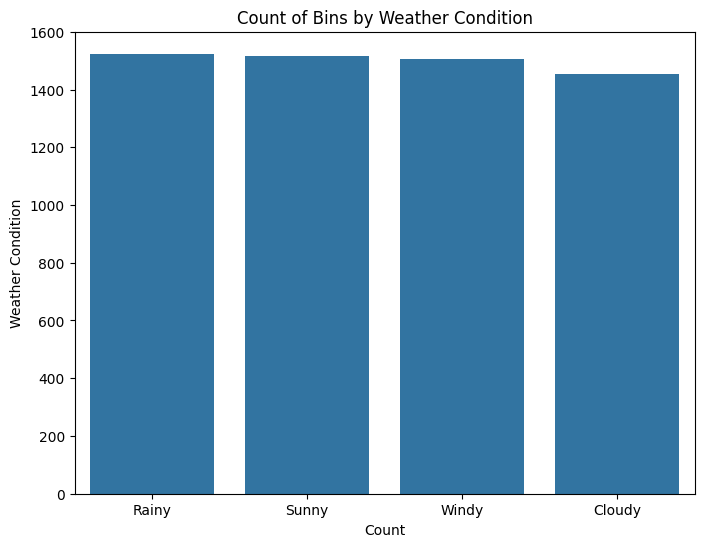

In [8]:

plt.figure(figsize=(8, 6))
sns.countplot(x='Weather', data=df, order = df['Weather'].value_counts().index)
plt.title('Count of Bins by Weather Condition')
plt.xlabel('Count')
plt.ylabel('Weather Condition')
plt.show()

In [9]:
df['Fill_Level(%)'].value_counts()

Fill_Level(%)
100    3998
93       60
99       57
98       57
94       57
       ... 
19        1
33        1
24        1
22        1
16        1
Name: count, Length: 81, dtype: int64

In [10]:
!pip install imbalanced-learn


In [11]:
from imblearn.over_sampling import SMOTE

In [12]:
smote = SMOTE()

In [13]:
# smote.fit(df['Fill_Level(%)'])

In [14]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Bin_ID                           6000 non-null   int64         
 1   Timestamp                        6000 non-null   datetime64[ns]
 2   Location                         6000 non-null   object        
 3   Area_Type                        6000 non-null   object        
 4   Time_Since_Last_Collection(hrs)  6000 non-null   int64         
 5   Fill_Level(%)                    6000 non-null   int64         
 6   Weather                          6000 non-null   object        
 7   Is_Full                          6000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 375.1+ KB


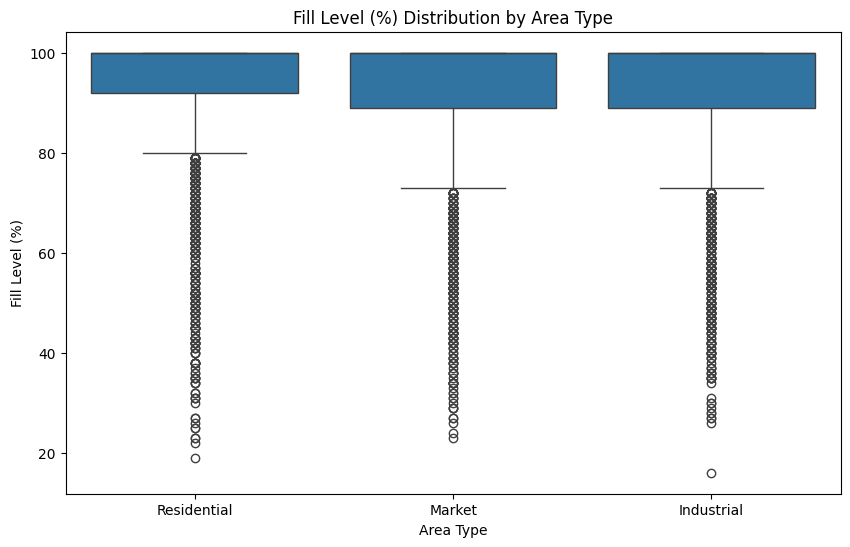

In [15]:
# Visualize the distribution of 'Fill_Level(%)' across different 'Area_Type'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Area_Type', y='Fill_Level(%)', data=df)
plt.title('Fill Level (%) Distribution by Area Type')
plt.xlabel('Area Type')
plt.ylabel('Fill Level (%)')
plt.show()



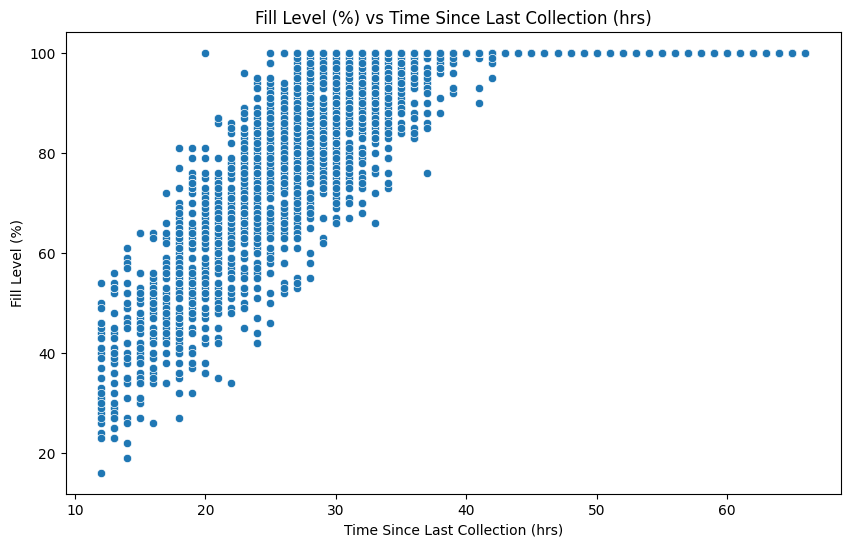

In [16]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time_Since_Last_Collection(hrs)', y='Fill_Level(%)', data=df)
plt.title('Fill Level (%) vs Time Since Last Collection (hrs)')
plt.xlabel('Time Since Last Collection (hrs)')
plt.ylabel('Fill Level (%)')
plt.show()

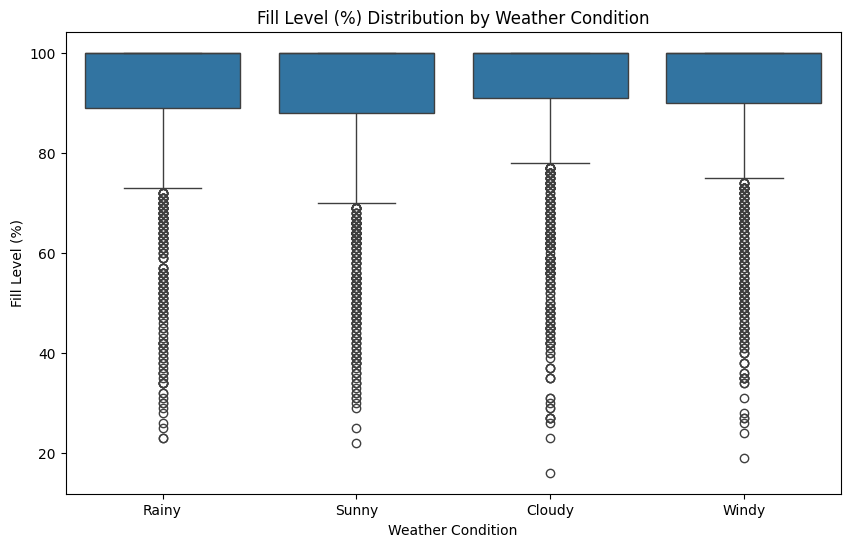

In [17]:
# Visualize the distribution of 'Fill_Level(%)' across different 'Weather' conditions
plt.figure(figsize=(10, 6))
sns.boxplot(x='Weather', y='Fill_Level(%)', data=df)
plt.title('Fill Level (%) Distribution by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Fill Level (%)')
plt.show()

In [18]:
df['Hour'] = df['Timestamp'].dt.hour
df['Day_of_Week'] = df['Timestamp'].dt.dayofweek
df['Day_of_Month'] = df['Timestamp'].dt.day
display(df.head())

,Bin_ID,Timestamp,Location,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full,Hour,Day_of_Week,Day_of_Month
0,1,2025-07-01 00:00:00,Area_7,Residential,24,80,Rainy,1,0,1,1
1,1,2025-07-01 06:00:00,Area_7,Residential,30,93,Rainy,1,6,1,1
2,1,2025-07-01 12:00:00,Area_7,Residential,36,100,Sunny,1,12,1,1
3,1,2025-07-01 18:00:00,Area_7,Residential,42,100,Sunny,1,18,1,1
4,2,2025-07-01 00:00:00,Area_3,Market,47,100,Rainy,1,0,1,1


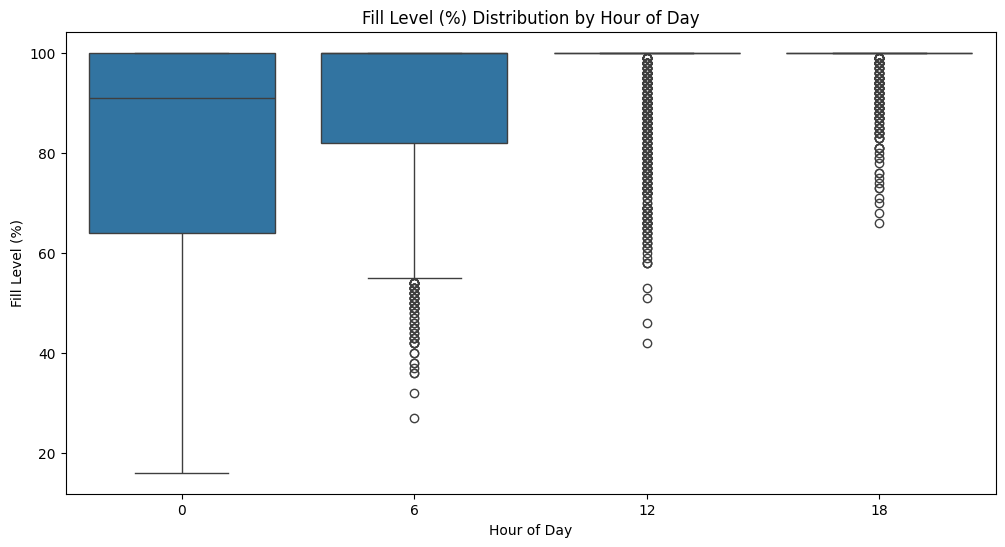

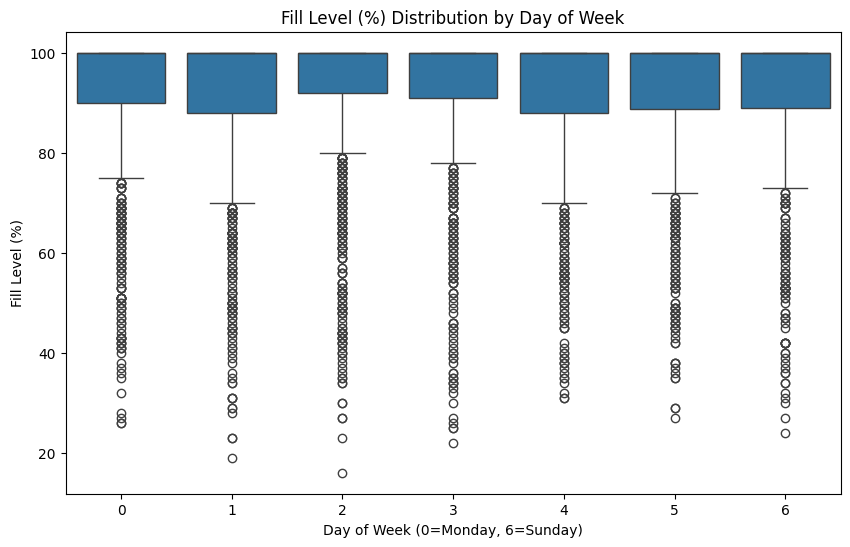

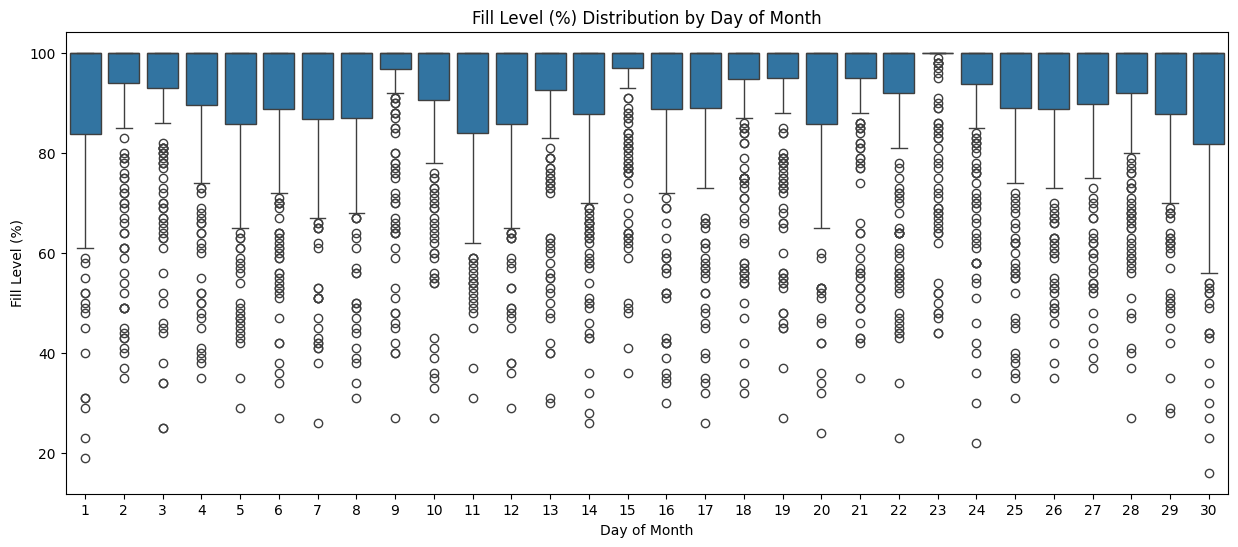

In [19]:
# Visualize the distribution of 'Fill_Level(%)' across different hours of the day
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Fill_Level(%)', data=df)
plt.title('Fill Level (%) Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Fill Level (%)')
plt.show()

# Visualize the distribution of 'Fill_Level(%)' across different days of the week
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_Week', y='Fill_Level(%)', data=df)
plt.title('Fill Level (%) Distribution by Day of Week')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Fill Level (%)')
plt.show()

# Visualize the distribution of 'Fill_Level(%)' across different days of the month
plt.figure(figsize=(15, 6))
sns.boxplot(x='Day_of_Month', y='Fill_Level(%)', data=df)
plt.title('Fill Level (%) Distribution by Day of Month')
plt.xlabel('Day of Month')
plt.ylabel('Fill Level (%)')
plt.show()

<Axes: >

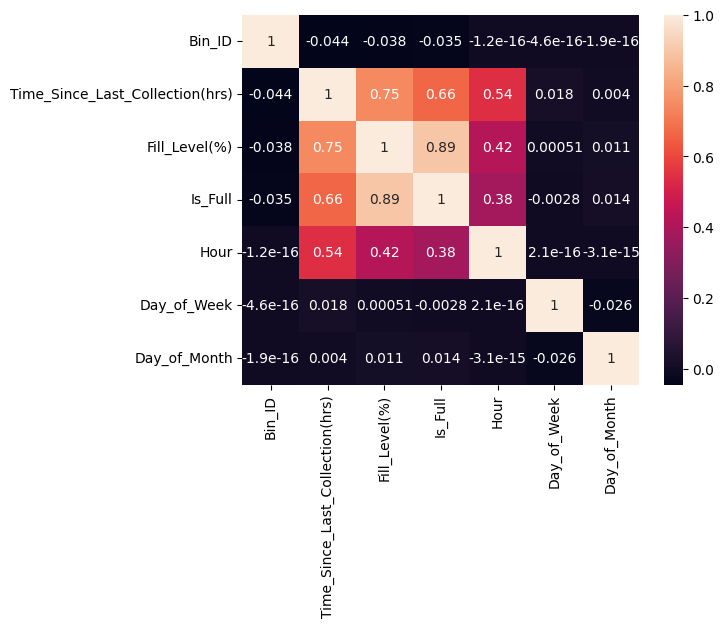

In [20]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [21]:
df.head()

,Bin_ID,Timestamp,Location,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full,Hour,Day_of_Week,Day_of_Month
0,1,2025-07-01 00:00:00,Area_7,Residential,24,80,Rainy,1,0,1,1
1,1,2025-07-01 06:00:00,Area_7,Residential,30,93,Rainy,1,6,1,1
2,1,2025-07-01 12:00:00,Area_7,Residential,36,100,Sunny,1,12,1,1
3,1,2025-07-01 18:00:00,Area_7,Residential,42,100,Sunny,1,18,1,1
4,2,2025-07-01 00:00:00,Area_3,Market,47,100,Rainy,1,0,1,1


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])

In [23]:
df.head()

,Bin_ID,Timestamp,Location,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full,Hour,Day_of_Week,Day_of_Month
0,1,2025-07-01 00:00:00,7,Residential,24,80,Rainy,1,0,1,1
1,1,2025-07-01 06:00:00,7,Residential,30,93,Rainy,1,6,1,1
2,1,2025-07-01 12:00:00,7,Residential,36,100,Sunny,1,12,1,1
3,1,2025-07-01 18:00:00,7,Residential,42,100,Sunny,1,18,1,1
4,2,2025-07-01 00:00:00,3,Market,47,100,Rainy,1,0,1,1


In [24]:
# df['Area_Type'] = le.fit_transform(df['Area_Type'])

In [25]:
# df['Weather'] = le.fit_transform(df['Weather'])

In [26]:
df.head()

,Bin_ID,Timestamp,Location,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full,Hour,Day_of_Week,Day_of_Month
0,1,2025-07-01 00:00:00,7,Residential,24,80,Rainy,1,0,1,1
1,1,2025-07-01 06:00:00,7,Residential,30,93,Rainy,1,6,1,1
2,1,2025-07-01 12:00:00,7,Residential,36,100,Sunny,1,12,1,1
3,1,2025-07-01 18:00:00,7,Residential,42,100,Sunny,1,18,1,1
4,2,2025-07-01 00:00:00,3,Market,47,100,Rainy,1,0,1,1


In [27]:
df.drop(columns=['Location','Timestamp','Day_of_Week','Day_of_Month'],inplace =True,axis=1)

In [28]:
df.head()

,Bin_ID,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full,Hour
0,1,Residential,24,80,Rainy,1,0
1,1,Residential,30,93,Rainy,1,6
2,1,Residential,36,100,Sunny,1,12
3,1,Residential,42,100,Sunny,1,18
4,2,Market,47,100,Rainy,1,0


In [29]:
X = df[['Area_Type', 'Time_Since_Last_Collection(hrs)', 'Weather']]
y = df['Is_Full']

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [44]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [46]:
# Example mappings
area_mapping = {'Residential':0, 'Market':1, 'Industrial':2}
weather_mapping = {'Sunny':0, 'Rainy':1, 'Cloudy':2}  # include all known categories

# Encode training set
X_train['Area_Type'] = X_train['Area_Type'].map(area_mapping).fillna(-1)
X_train['Weather'] = X_train['Weather'].map(weather_mapping).fillna(-1)

# Encode test set
X_test['Area_Type'] = X_test['Area_Type'].map(area_mapping).fillna(-1)
X_test['Weather'] = X_test['Weather'].map(weather_mapping).fillna(-1)


In [47]:
print(X_train.isna().sum())


Area_Type                          0
Time_Since_Last_Collection(hrs)    0
Weather                            0
dtype: int64


In [48]:
X_train = X_train.fillna(X_train.median())
X_test = X_test.fillna(X_train.median())  # use training median


In [49]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("After SMOTE:", Counter(y_train_res))

After SMOTE: Counter({1: 3919, 0: 3919})


In [50]:
X_train_res

,Area_Type,Time_Since_Last_Collection(hrs),Weather
0,1,28,0.000000
1,2,35,1.000000
2,2,32,-1.000000
3,2,50,1.000000
4,2,37,0.000000
...,...,...,...
7833,2,16,-1.000000
7834,2,17,-1.000000
7835,2,15,0.800371
7836,2,24,2.000000


In [36]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit on training data
X_train_encoded = encoder.fit_transform(X_train[['Weather', 'Area_Type']])

# Transform test data
X_test_encoded = encoder.transform(X_test[['Weather', 'Area_Type']])


array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()

In [51]:
X_train_res_scale = sc.fit_transform(X_train_res)
X_test_scale = sc.transform(X_test)


In [53]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_res_scale, y_train_res)

RandomForestClassifier(random_state=42)

In [54]:
y_pred = model.predict(X_test_scale)


In [58]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9241666666666667


NameError: name 'confusion_matrix' is not defined

In [59]:
df.head()


,Bin_ID,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full,Hour
0,1,Residential,24,80,Rainy,1,0
1,1,Residential,30,93,Rainy,1,6
2,1,Residential,36,100,Sunny,1,12
3,1,Residential,42,100,Sunny,1,18
4,2,Market,47,100,Rainy,1,0


In [60]:
y_pred = model.predict(X_test_scale)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.89      0.79       196
           1       0.98      0.93      0.95      1004

    accuracy                           0.92      1200
   macro avg       0.85      0.91      0.87      1200
weighted avg       0.93      0.92      0.93      1200



In [61]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9241666666666667


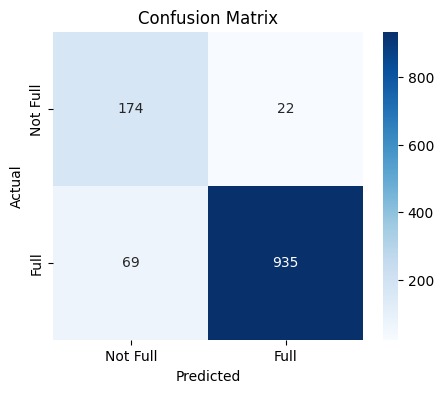

Classification Report:
              precision    recall  f1-score   support

    Not Full       0.72      0.89      0.79       196
        Full       0.98      0.93      0.95      1004

    accuracy                           0.92      1200
   macro avg       0.85      0.91      0.87      1200
weighted avg       0.93      0.92      0.93      1200

Balanced Accuracy: 90.95 %


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


y_pred_classes = model.predict(X_test_scale)
y_true = y_test


labels = ["Not Full", "Full"]

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=labels))

balanced_acc = balanced_accuracy_score(y_true, y_pred_classes)
print("Balanced Accuracy:", round(balanced_acc*100, 2), "%")

In [64]:
import joblib
joblib.dump(model, "best_model.pkl")
model_loaded = joblib.load("best_model.pkl")

#Recall  :- how many you priditicted right among all population'
#precision :- how many you pridited true among priditions.

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:02:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report (XGBoost):
              precision    recall  f1-score   support

    Not Full       0.76      0.92      0.84       196
        Full       0.98      0.94      0.96      1004

    accuracy                           0.94      1200
   macro avg       0.87      0.93      0.90      1200
weighted avg       0.95      0.94      0.94      1200



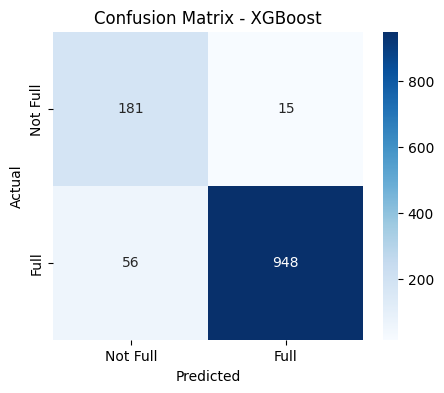

Balanced Accuracy (XGBoost): 93.38 %


In [139]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


xgb_model = XGBClassifier(
    n_estimators=200,          # number of trees
    learning_rate=0.1,         # step size shrinkage
    max_depth=6,               # depth of trees
    subsample=0.8,             # fraction of samples used for training each tree
    colsample_bytree=0.8,      # fraction of features used per tree
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_resampled, y_resampled)

# Predict on test data
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("Classification Report (XGBoost):")
print(classification_report(y_test, y_pred_xgb, target_names=["Not Full", "Full"]))

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Full","Full"], yticklabels=["Not Full","Full"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - XGBoost")
plt.show()

balanced_acc_xgb = balanced_accuracy_score(y_test, y_pred_xgb)
print("Balanced Accuracy (XGBoost):", round(balanced_acc_xgb*100, 2), "%")


Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

    Not Full       0.71      0.95      0.81       196
        Full       0.99      0.92      0.96      1004

    accuracy                           0.93      1200
   macro avg       0.85      0.94      0.88      1200
weighted avg       0.94      0.93      0.93      1200



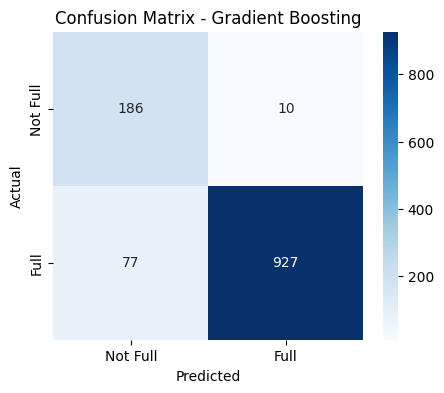

Balanced Accuracy (Gradient Boosting): 93.61 %


In [50]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=200,    # number of boosting stages
    learning_rate=0.1,   # shrinkage rate
    max_depth=3,         # depth of trees
    random_state=42
)

gb_model.fit(X_resampled, y_resampled)

# Predict on test data
y_pred_gb = gb_model.predict(X_test)

# Evaluation
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb, target_names=["Not Full", "Full"]))

cm = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Full","Full"], yticklabels=["Not Full","Full"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

balanced_acc_gb = balanced_accuracy_score(y_test, y_pred_gb)
print("Balanced Accuracy (Gradient Boosting):", round(balanced_acc_gb*100, 2), "%")


Classification Report (SVM):
              precision    recall  f1-score   support

    Not Full       0.64      0.96      0.77       196
        Full       0.99      0.90      0.94      1004

    accuracy                           0.91      1200
   macro avg       0.82      0.93      0.86      1200
weighted avg       0.94      0.91      0.91      1200



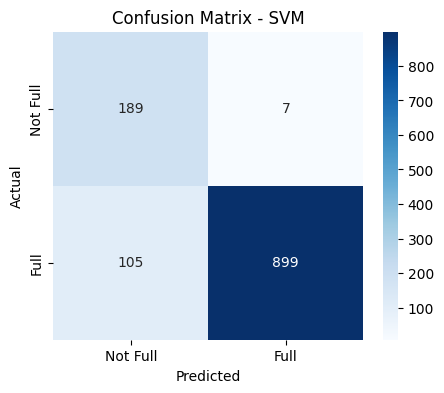

Balanced Accuracy (SVM): 92.99 %


In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score


svm_model = SVC(kernel='rbf', probability=True, random_state=42)

svm_model.fit(X_resampled, y_resampled)


y_pred_svm = svm_model.predict(X_test)


print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=["Not Full", "Full"]))

cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Full","Full"], yticklabels=["Not Full","Full"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - SVM")
plt.show()

balanced_acc_svm = balanced_accuracy_score(y_test, y_pred_svm)
print("Balanced Accuracy (SVM):", round(balanced_acc_svm*100, 2), "%")



In [140]:
import pandas as pd
import numpy as np

rng = np.random.default_rng(42)
n_bins = len(df)

center_lat, center_lon = 21.1702, 72.8311 
df['Latitude'] = center_lat + rng.normal(0, 0.02, size=n_bins)  
df['Longitude'] = center_lon + rng.normal(0, 0.02, size=n_bins)


df.to_csv("smart_bin_dataset_with_location.csv", index=False)

print("New dataset saved: smart_bin_dataset_with_location.csv")
df.head()


New dataset saved: smart_bin_dataset_with_location.csv


,Bin_ID,Area_Type,Time_Since_Last_Collection(hrs),Fill_Level(%),Weather,Is_Full,Hour,Latitude,Longitude
0,1,Residential,24,80,Rainy,1,0,21.176294,72.835602
1,1,Residential,30,93,Rainy,1,6,21.149400,72.830033
2,1,Residential,36,100,Sunny,1,12,21.185209,72.848381
3,1,Residential,42,100,Sunny,1,18,21.189011,72.843235
4,2,Market,47,100,Rainy,1,0,21.131179,72.771384


In [143]:
import joblib
import pandas as pd

# Load pipeline
pipeline = joblib.load("best_model.pkl")

# Predict using the pipeline (it handles categorical encoding automatically)
df['Is_Full'] = pipeline.predict(df[['Area_Type', 'Time_Since_Last_Collection(hrs)', 'Weather']])

# Filter full bins
full_bins = df[df['Is_Full'] == 1].copy()
print("Number of full bins:", len(full_bins))


Number of full bins: 4618


In [144]:
grouped_bins = full_bins.groupby("Area_Type")


In [145]:
!pip install networkx


In [146]:
from math import radians, sin, cos, sqrt, atan2


def haversine(lat1, lon1, lat2, lon2):
    R = 6371  
    dlat = radians(lat2 - lat1)
    dlon = radians(lon2 - lon1)
    a = sin(dlat/2)**2 + cos(radians(lat1)) * cos(radians(lat2)) * sin(dlon/2)**2
    return R * (2 * atan2(sqrt(a), sqrt(1-a)))


In [147]:
joblib.dump(haversine, 'haversine.pkl')

['haversine.pkl']

In [148]:
import networkx as nx


def nearest_neighbor_route(G, start="Depot"):
    unvisited = set(G.nodes)
    unvisited.remove(start)
    route = [start]
    current = start 
    while unvisited:
        next_node = min(unvisited, key=lambda x: G[current][x]['weight'])
        route.append(next_node)
        unvisited.remove(next_node)
        current = next_node
    route.append(start)  
    return route


def route_length(route, G):
    return sum(G[route[i]][route[i+1]]['weight'] for i in range(len(route)-1))


In [48]:
depot_lat, depot_lon = 21.1702, 72.8311  

routes = {}
for area, group in grouped_bins:
    G = nx.Graph()
    G.add_node("Depot", lat=depot_lat, lon=depot_lon)

    # Add bins in this area
    for idx, row in group.iterrows():
        G.add_node(f"Bin_{idx}", lat=row['Latitude'], lon=row['Longitude'])

    # Add edges with distances
    nodes = list(G.nodes(data=True))
    for i in range(len(nodes)):
        for j in range(i+1, len(nodes)):
            n1, d1 = nodes[i]
            n2, d2 = nodes[j]
            dist = haversine(d1['lat'], d1['lon'], d2['lat'], d2['lon'])
            G.add_edge(n1, n2, weight=dist)

    # Optimize route
    route = nearest_neighbor_route(G, start="Depot")
    distance = route_length(route, G)

    routes[area] = {"route": route, "distance": distance}


for area, result in routes.items():
    print(f"\n Area: {area}")
    print("Optimized Route:", " -> ".join(result['route']))
    print("Total Distance (km):", round(result['distance'], 2))



 Area: 0
Optimized Route: Depot -> Bin_855 -> Bin_2378 -> Bin_908 -> Bin_863 -> Bin_1482 -> Bin_202 -> Bin_2630 -> Bin_5077 -> Bin_2905 -> Bin_3787 -> Bin_5658 -> Bin_4534 -> Bin_5529 -> Bin_2006 -> Bin_199 -> Bin_5239 -> Bin_2263 -> Bin_3813 -> Bin_1131 -> Bin_472 -> Bin_2239 -> Bin_970 -> Bin_2073 -> Bin_1113 -> Bin_254 -> Bin_1504 -> Bin_4457 -> Bin_5804 -> Bin_3786 -> Bin_5657 -> Bin_867 -> Bin_4934 -> Bin_2999 -> Bin_3838 -> Bin_634 -> Bin_555 -> Bin_2479 -> Bin_5855 -> Bin_1674 -> Bin_2522 -> Bin_5111 -> Bin_2748 -> Bin_3542 -> Bin_4694 -> Bin_843 -> Bin_3624 -> Bin_3945 -> Bin_4621 -> Bin_4812 -> Bin_2692 -> Bin_1374 -> Bin_4206 -> Bin_1028 -> Bin_5731 -> Bin_4312 -> Bin_3713 -> Bin_4610 -> Bin_1972 -> Bin_922 -> Bin_3416 -> Bin_1115 -> Bin_5769 -> Bin_5659 -> Bin_5621 -> Bin_2603 -> Bin_5755 -> Bin_2962 -> Bin_1503 -> Bin_1459 -> Bin_777 -> Bin_4482 -> Bin_3557 -> Bin_1009 -> Bin_959 -> Bin_1342 -> Bin_3534 -> Bin_2177 -> Bin_1481 -> Bin_4247 -> Bin_4752 -> Bin_3244 -> Bin_105

In [49]:
!pip install folium

In [50]:
import folium

# Depot location (Surat center)
depot_lat, depot_lon = 21.1702, 72.8311  

# Create maps for each area
for area, group in grouped_bins:
    
    m = folium.Map(location=[depot_lat, depot_lon], zoom_start=12)

    # Add Depot marker
    folium.Marker(
        [depot_lat, depot_lon], popup="Depot",
        icon=folium.Icon(color="red", icon="home")
    ).add_to(m)

    # Add bin markers
    for idx, row in group.iterrows():
        folium.CircleMarker(
            [row['Latitude'], row['Longitude']],
            radius=4, color="blue", fill=True,
            popup=f"Bin_{idx}"
        ).add_to(m)

    # Get optimized route for this area
    route = routes[area]["route"]
    coords = [(depot_lat, depot_lon)] + [
        (group.loc[int(node.split("_")[1])]['Latitude'],
         group.loc[int(node.split("_")[1])]['Longitude'])
        for node in route if node != "Depot"
    ] + [(depot_lat, depot_lon)]

    # Draw route as polyline
    folium.PolyLine(coords, color="green", weight=2.5, opacity=1).add_to(m)

    # Save map as HTML per area
    filename = f"optimized_route_{area}.html"
    m.save(filename)
    print(f" Map for {area} saved as {filename}")


 Map for 0 saved as optimized_route_0.html
 Map for 1 saved as optimized_route_1.html
 Map for 2 saved as optimized_route_2.html


In [51]:
pip install osmnx networkx folium

Note: you may need to restart the kernel to use updated packages.


In [52]:
pip install geopandas shapely rtree


Note: you may need to restart the kernel to use updated packages.


In [53]:
import osmnx as ox
import networkx as nx
import folium


start = (21.1702, 72.8311)  # Example: Surat City
end = (21.2000, 72.8500)    


G = ox.graph_from_point(start, dist=3000, network_type='drive')


orig_node = ox.distance.nearest_nodes(G, start[1], start[0])
dest_node = ox.distance.nearest_nodes(G, end[1], end[0])


route = nx.shortest_path(G, orig_node, dest_node, weight="length")


route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]


m = folium.Map(location=start, zoom_start=14)


folium.PolyLine(route_coords, color="blue", weight=4.5, opacity=0.8).add_to(m)


folium.Marker(start, popup="Start", icon=folium.Icon(color="green")).add_to(m)
folium.Marker(end, popup="End", icon=folium.Icon(color="red")).add_to(m)

m.save("route_map_Actual.html")


In [54]:
import osmnx as ox
import networkx as nx
import folium


start = (21.1702, 72.8311)  # Depot (Surat)
end = (21.2000, 72.8500)    # Example endpoint


G = ox.graph_from_point((depot_lat, depot_lon), dist=20000, network_type="drive")


# Collect locations (Depot + Full Bins + End)
locations = [(start[0], start[1], "Depot")]

for idx, row in full_bins.head(10).iterrows():
    locations.append((row['Latitude'], row['Longitude'], f"Bin_{idx}"))

locations.append((end[0], end[1], "End"))

#  Convert locations to nearest road nodes
nodes = {}
for lat, lon, name in locations:
    node = ox.distance.nearest_nodes(G, lon, lat)
    nodes[name] = node

#  Build full route visiting all bins in sequence
route = []
for i in range(len(locations)-1):
    src = locations[i][2]   # name
    dst = locations[i+1][2]
    
    try:
        path = nx.shortest_path(G, nodes[src], nodes[dst], weight="length")
        route.extend(path[:-1])  # skip duplicate
    except nx.NetworkXNoPath:
        print(f" No path between {src} and {dst}, skipping...")

    
    
route.append(nodes["End"])

#  Convert route nodes to coordinates
route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]

#  Plot on map
m = folium.Map(location=start, zoom_start=14)
folium.PolyLine(route_coords, color="blue", weight=4.5, opacity=0.8).add_to(m)

# Add depot, bins, and end as markers
for lat, lon, name in locations:
    color = "green" if name == "Depot" else "red" if name == "End" else "orange"
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color=color)).add_to(m)



m.save("route_with_bins_roads.html")
print(" Map saved as route_with_bins_roads.html")


 Map saved as route_with_bins_roads.html


In [55]:
import osmnx as ox
import networkx as nx
import folium
from networkx.algorithms import approximation as approx


depot_lat, depot_lon = 21.1702, 72.8311
start = (depot_lat, depot_lon)
end = (21.2000, 72.8500)


G = ox.graph_from_point((depot_lat, depot_lon), dist=2000, network_type="drive")


sample_bins = full_bins.head(3)


locations = [(start[0], start[1], "Depot")]
for idx, row in sample_bins.iterrows():
    locations.append((row['Latitude'], row['Longitude'], f"Bin_{idx}"))
locations.append((end[0], end[1], "End"))

 
nodes = {}
for lat, lon, name in locations:
    nodes[name] = ox.distance.nearest_nodes(G, lon, lat)


H = nx.Graph()
for name1, node1 in nodes.items():
    for name2, node2 in nodes.items():
        if name1 != name2:
            try:
                length = nx.shortest_path_length(G, node1, node2, weight="length")
            except nx.NetworkXNoPath:
                length = float("inf")  # no connection
            H.add_edge(name1, name2, weight=length)


tsp_order = approx.traveling_salesman_problem(H, weight="weight", cycle=False)
print("Optimized visiting order:", tsp_order)


route = []
for i in range(len(tsp_order)-1):
    src = nodes[tsp_order[i]]
    dst = nodes[tsp_order[i+1]]
    try:
        path = nx.shortest_path(G, src, dst, weight="length")
        route.extend(path[:-1])
    except nx.NetworkXNoPath:
        print(f" Skipping unreachable {tsp_order[i]} -> {tsp_order[i+1]}")
route.append(nodes[tsp_order[-1]])


route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]


m = folium.Map(location=start, zoom_start=14)
folium.PolyLine(route_coords, color="blue", weight=4.5, opacity=0.8).add_to(m)

for lat, lon, name in locations:
    color = "green" if name == "Depot" else "red" if name == "End" else "orange"
    folium.Marker([lat, lon], popup=name, icon=folium.Icon(color=color)).add_to(m)

m.save("tsp_fixed.html")
print(" Map saved as tsp_fixed.html")


Optimized visiting order: ['Bin_1', 'Depot', 'Bin_3', 'End', 'Bin_2']
 Map saved as tsp_fixed.html


In [56]:
import osmnx as ox
import networkx as nx
import folium

# Depot (Surat)
depot_lat, depot_lon = 21.1702, 72.8311
start = (depot_lat, depot_lon)


G = ox.graph_from_point((depot_lat, depot_lon), dist=5000, network_type="drive")


truck_capacity = 5  
avg_speed = 30      


bins = full_bins.head(12)  
bin_groups = [bins[i:i+truck_capacity] for i in range(0, len(bins), truck_capacity)]

routes = []

for truck_id, group in enumerate(bin_groups, 1):
    
    locations = [(depot_lat, depot_lon, "Depot")]
    for idx, row in group.iterrows():
        locations.append((row["Latitude"], row["Longitude"], f"Bin_{idx}"))
    locations.append((depot_lat, depot_lon, "Depot"))

   
    nodes = {}
    for lat, lon, name in locations:
        nodes[name] = ox.distance.nearest_nodes(G, lon, lat)

    
    route = []
    total_dist = 0
    for i in range(len(locations)-1):
        src = nodes[locations[i][2]]
        dst = nodes[locations[i+1][2]]
        try:
            path = nx.shortest_path(G, src, dst, weight="length")
            dist = nx.shortest_path_length(G, src, dst, weight="length")
            total_dist += dist
            route.extend(path[:-1])
        except nx.NetworkXNoPath:
            print(f" No path between {locations[i][2]} and {locations[i+1][2]}")

    route.append(nodes["Depot"])

    # Convert distance → km and time
    total_km = total_dist / 1000
    total_time = (total_km / avg_speed) * 60  

    routes.append({"truck": truck_id, "route": route, "distance_km": total_km, "time_min": total_time})

    # Plot
    route_coords = [(G.nodes[node]["y"], G.nodes[node]["x"]) for node in route]
    m = folium.Map(location=start, zoom_start=13)
    folium.PolyLine(route_coords, color="blue", weight=4.5, opacity=0.8).add_to(m)

    for lat, lon, name in locations:
        folium.Marker([lat, lon], popup=f"{name} (Truck {truck_id})",
                      icon=folium.Icon(color="green" if name=="Depot" else "orange")).add_to(m)

    m.save(f"truck_{truck_id}_route.html")
    print(f" Truck {truck_id}: {round(total_km,2)} km, {round(total_time,1)} min")


 No path between Bin_4 and Bin_5
 Truck 1: 23.42 km, 46.8 min
 Truck 2: 21.74 km, 43.5 min
 Truck 3: 10.05 km, 20.1 min


In [57]:
import osmnx as ox
import networkx as nx
import folium
import math

# ✅ Depot location (Surat center)
depot_lat, depot_lon = 21.1702, 72.8311
depot = (depot_lat, depot_lon)

# ✅ Load road network around depot (20 km radius)
G = ox.graph_from_point(depot, dist=20000, network_type="drive")

# ✅ Function to split bins into chunks (for trucks)
def split_bins(group, num_trucks):
    bins = list(group.index)
    chunk_size = math.ceil(len(bins) / num_trucks)
    return [bins[i:i+chunk_size] for i in range(0, len(bins), chunk_size)]

# ✅ Iterate through areas
num_trucks_per_area = 2   # you can change this
truck_id = 1

for area, group in grouped_bins:  # grouped_bins = full_bins.groupby("Area_Type")
    print(f"\n🚩 Area: {area}")
    
    # Split bins for trucks
    truck_bins = split_bins(group, num_trucks_per_area)
    
    for t, bins_subset in enumerate(truck_bins, start=1):
        print(f"  🚛 Truck {truck_id} handles {len(bins_subset)} bins")
        
        # Collect locations: Depot + bins
        locations = [(depot_lat, depot_lon, "Depot")]
        for idx in bins_subset:
            row = group.loc[idx]
            locations.append((row['Latitude'], row['Longitude'], f"Bin_{idx}"))
        locations.append((depot_lat, depot_lon, "Depot_End"))  # return to depot

        # Convert to nearest road nodes
        nodes = {}
        for lat, lon, name in locations:
            nodes[name] = ox.distance.nearest_nodes(G, lon, lat)

        # Build route visiting bins in sequence (Depot -> bins -> Depot)
        route = []
        for i in range(len(locations)-1):
            src = locations[i][2]
            dst = locations[i+1][2]
            try:
                path = nx.shortest_path(G, nodes[src], nodes[dst], weight="length")
                route.extend(path[:-1])  # avoid duplicate
            except nx.NetworkXNoPath:
                print(f"⚠️ No path between {src} and {dst}, skipping...")
        route.append(nodes[locations[-1][2]])

        # Convert route to coordinates
        route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]

        # Create map
        m = folium.Map(location=[depot_lat, depot_lon], zoom_start=13)
        folium.PolyLine(route_coords, color="blue", weight=4.5, opacity=0.8).add_to(m)

        # Add markers
        for lat, lon, name in locations:
            color = "green" if "Depot" in name else "orange"
            folium.Marker([lat, lon], popup=name, icon=folium.Icon(color=color)).add_to(m)

        # Save map for this truck
        filename = f"FF-optimized_route_area{area}_truck{truck_id}.html"
        m.save(filename)
        print(f"     ✅ Saved map: {filename}")
        
        truck_id += 1



🚩 Area: 0
  🚛 Truck 1 handles 755 bins
⚠️ No path between Bin_505 and Bin_506, skipping...
     ✅ Saved map: FF-optimized_route_area0_truck1.html
  🚛 Truck 2 handles 755 bins
⚠️ No path between Bin_4455 and Bin_4456, skipping...
     ✅ Saved map: FF-optimized_route_area0_truck2.html

🚩 Area: 1
  🚛 Truck 3 handles 761 bins


KeyboardInterrupt: 

In [58]:
import osmnx as ox
import networkx as nx
import folium
import math

# ✅ Depot location (Surat center)
depot_lat, depot_lon = 21.1702, 72.8311
depot = (depot_lat, depot_lon)

# ✅ Load road network around depot (20 km radius)
G = ox.graph_from_point(depot, dist=20000, network_type="drive")

# ✅ Function to split bins into chunks (for trucks)
def split_bins(group, num_trucks):
    bins = list(group.index)
    chunk_size = math.ceil(len(bins) / num_trucks)
    return [bins[i:i+chunk_size] for i in range(0, len(bins), chunk_size)]

# ✅ Number of trucks per area (you can change this)
num_trucks_per_area = 2   
truck_id = 1

for area, group in grouped_bins:  # grouped_bins = full_bins.groupby("Area_Type")
    print(f"\n🚩 Area: {area}")
    
    # Split bins for trucks
    truck_bins = split_bins(group, num_trucks_per_area)
    
    for t, bins_subset in enumerate(truck_bins, start=1):
        print(f"\n🚛 Truck {truck_id} in Area {area} will handle {len(bins_subset)} bins")
        
        # Collect locations: Depot + bins + Depot_End
        locations = [(depot_lat, depot_lon, "Depot")]
        for idx in bins_subset:
            row = group.loc[idx]
            locations.append((row['Latitude'], row['Longitude'], f"Bin_{idx}"))
        locations.append((depot_lat, depot_lon, "Depot_End"))

        # Print visiting order (text)
        print("   Visiting Order:")
        for stop in locations:
            print("   →", stop[2])

        # Convert to nearest road nodes
        nodes = {}
        for lat, lon, name in locations:
            nodes[name] = ox.distance.nearest_nodes(G, lon, lat)

        # Build road route (Depot → bins → Depot_End)
        route = []
        for i in range(len(locations)-1):
            src = locations[i][2]
            dst = locations[i+1][2]
            try:
                path = nx.shortest_path(G, nodes[src], nodes[dst], weight="length")
                route.extend(path[:-1])  # avoid duplicate
            except nx.NetworkXNoPath:
                print(f"⚠️ No path between {src} and {dst}, skipping...")
        route.append(nodes[locations[-1][2]])

        # Convert route to coordinates
        route_coords = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in route]

        # Create map
        m = folium.Map(location=[depot_lat, depot_lon], zoom_start=13)
        folium.PolyLine(route_coords, color="blue", weight=4.5, opacity=0.8).add_to(m)

        # Add markers
        for lat, lon, name in locations:
            color = "green" if "Depot" in name else "orange"
            folium.Marker([lat, lon], popup=name, icon=folium.Icon(color=color)).add_to(m)

        # Save map for this truck
        filename = f"FFFFF- optimized_route_area{area}_truck{truck_id}.html"
        m.save(filename)
        print(f"   ✅ Saved map: {filename}")
        
        truck_id += 1



🚩 Area: 0

🚛 Truck 1 in Area 0 will handle 755 bins
   Visiting Order:
   → Depot
   → Bin_53
   → Bin_54
   → Bin_55
   → Bin_60
   → Bin_61
   → Bin_62
   → Bin_63
   → Bin_68
   → Bin_69
   → Bin_70
   → Bin_71
   → Bin_77
   → Bin_78
   → Bin_79
   → Bin_85
   → Bin_86
   → Bin_87
   → Bin_93
   → Bin_94
   → Bin_95
   → Bin_98
   → Bin_99
   → Bin_133
   → Bin_134
   → Bin_135
   → Bin_136
   → Bin_137
   → Bin_138
   → Bin_139
   → Bin_164
   → Bin_165
   → Bin_166
   → Bin_167
   → Bin_171
   → Bin_181
   → Bin_182
   → Bin_183
   → Bin_196
   → Bin_197
   → Bin_198
   → Bin_199
   → Bin_202
   → Bin_203
   → Bin_220
   → Bin_221
   → Bin_222
   → Bin_223
   → Bin_236
   → Bin_237
   → Bin_238
   → Bin_239
   → Bin_252
   → Bin_253
   → Bin_254
   → Bin_255
   → Bin_279
   → Bin_283
   → Bin_301
   → Bin_302
   → Bin_303
   → Bin_326
   → Bin_327
   → Bin_328
   → Bin_329
   → Bin_330
   → Bin_331
   → Bin_337
   → Bin_338
   → Bin_339
   → Bin_348
   → Bin_349
   → Bin_350
   

KeyboardInterrupt: 

In [150]:
import osmnx as ox
import networkx as nx
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
from tqdm import tqdm




# Setup depot and bins as before
depot_lat, depot_lon = 21.1702, 72.8311
start = (depot_lat, depot_lon)
full_bins = df[df['Is_Full'] == 1].copy()
G = ox.graph_from_point(start, dist=20000, network_type="drive")
truck_speed = 30  # km/h
grouped_bins = full_bins.groupby("Area_Type")
BATCH_SIZE = 100  # Tune batch size for memory/performance tradeoff

def compute_batch_distances(graph, nodes_dict, batch_nodes):
    # Compute shortest path lengths from multiple sources in batch
    sources = [nodes_dict[name] for name in batch_nodes]
    lengths = nx.multi_source_dijkstra_path_length(graph, sources, weight="length")
    results = []
    for source_name in batch_nodes:
        source_node = nodes_dict[source_name]
        for target_name, target_node in nodes_dict.items():
            if source_name == target_name:
                dist = 0
            else:
                dist = lengths.get(target_node, float("inf"))
            results.append((source_name, target_name, dist))
    return results

for area, group in grouped_bins:
    print(f"\n🚛 Computing matrix for {area} ({len(group)} bins)...")

    locations = [start + ("Depot",)]
    for idx, row in group.iterrows():
        locations.append((row["Latitude"], row["Longitude"], f"Bin_{idx}"))

    nodes = {}
    for lat, lon, name in locations:
        nodes[name] = ox.distance.nearest_nodes(G, lon, lat)

    node_names = list(nodes.keys())
    n = len(node_names)

    distance_matrix = pd.DataFrame(np.inf, index=node_names, columns=node_names)
    time_matrix = pd.DataFrame(np.inf, index=node_names, columns=node_names)

    # Split nodes into batches
    batches = [node_names[i : i + BATCH_SIZE] for i in range(0, n, BATCH_SIZE)]

    all_results = Parallel(n_jobs=-1, backend="loky")(
        delayed(compute_batch_distances)(G, nodes, batch) for batch in tqdm(batches, desc=f"🔄 {area} batches")
    )

    # Merge all batch results into final matrices
    for batch_result in all_results:
        for source_name, target_name, dist_meters in batch_result:
            distance_matrix.loc[source_name, target_name] = dist_meters / 1000  # meters to km
            if dist_meters == float("inf"):
                time_m = float("inf")
            else:
                time_m = (dist_meters / 1000) / truck_speed * 60
            time_matrix.loc[source_name, target_name] = time_m

    # Save to file
    distance_matrix.to_csv(f"distance_matrix_fullbins_{area}.csv")
    time_matrix.to_csv(f"time_matrix_fullbins_{area}.csv")

    print(f"✅ Saved distance and time matrices for {area}\n")



🚛 Computing matrix for Industrial (1537 bins)...


KeyboardInterrupt: 

In [151]:
import numpy as np
import pandas as pd

# Assuming full_bins and distance_matrices are loaded and aligned as before
# alpha, beta control weights for distance and fill importance.

def compute_weighted_cost(dist, fill, alpha, beta):
    """
    Compute weighted cost as linear combination:
    cost = alpha * distance + beta * (100 - fill_level)
    """
    return alpha * dist + beta * (100 - fill)

def get_weighted_matrix(area, alpha, beta):
    dist_matrix = distance_matrices[area]
    area_bins = full_bins[full_bins["Area_Type"] == area].copy()
    bin_ids_matrix = set(int(col.split('_')[1]) for col in dist_matrix.columns if col != "Depot")
    bin_ids_dataset = set(area_bins["Bin_ID"])
    common_bins = bin_ids_matrix.intersection(bin_ids_dataset)
    filtered_bins = area_bins[area_bins["Bin_ID"].isin(common_bins)].reset_index(drop=True)
    cols = ["Depot"] + [f"Bin_{bid}" for bid in common_bins]
    filtered_dist_matrix = dist_matrix.loc[cols, cols]

    weighted_matrix = filtered_dist_matrix.copy()

    for source in weighted_matrix.index:
        for target in weighted_matrix.columns:
            if source == target:
                weighted_matrix.loc[source, target] = 0
                continue

            dist_value = filtered_dist_matrix.loc[source, target]
            if target == "Depot" or source == "Depot":
                weighted_matrix.loc[source, target] = dist_value
                continue

            bin_id = int(target.split("_")[1])
            fill_level_row = filtered_bins[filtered_bins["Bin_ID"] == bin_id]
            fill_level = fill_level_row.iloc[0]["Fill_Level(%)"] if not fill_level_row.empty else 0

            if np.isfinite(dist_value):
                weighted_matrix.loc[source, target] = round(compute_weighted_cost(dist_value, fill_level, alpha, beta), 2)
            else:
                weighted_matrix.loc[source, target] = np.inf

    return weighted_matrix

# Example usage
alpha, beta = 0.6, 0.4  # Adjust as needed

area = "Residential"  # Example area
weighted_matrix = get_weighted_matrix(area, alpha, beta)

# Print or use weighted_matrix for routing
print(weighted_matrix.head())


        Depot  Bin_1  Bin_2  Bin_3  Bin_35  Bin_10  Bin_11  Bin_17  Bin_18  \
Depot     0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
Bin_1     0.0    0.0    0.0    0.8     0.0     0.0     0.0     0.0     0.0   
Bin_2     0.0    2.8    0.0    0.8     0.0     0.0     0.0     0.0     0.0   
Bin_3     0.0    2.8    0.0    0.0     0.0     0.0     0.0     0.0     0.0   
Bin_35    0.0    2.8    0.0    0.8     0.0     0.0     0.0     0.0     0.0   

        Bin_19  Bin_20  Bin_21  Bin_22  Bin_23  Bin_49  Bin_50  
Depot      0.0     0.0     0.0     0.0     0.0     0.0     0.0  
Bin_1      0.0     2.0     0.0     0.0     2.4     0.0     1.6  
Bin_2      0.0     2.0     0.0     0.0     2.4     0.0     1.6  
Bin_3      0.0     2.0     0.0     0.0     2.4     0.0     1.6  
Bin_35     0.0     2.0     0.0     0.0     2.4     0.0     1.6  


In [155]:
print(full_bins.head())
print(full_bins.columns)
print(full_bins['Fill_Level(%)'].describe())
print(full_bins['Area_Type'].unique())


   Bin_ID    Area_Type  Time_Since_Last_Collection(hrs)  Fill_Level(%)  \
1       1  Residential                               30             93   
2       1  Residential                               36            100   
3       1  Residential                               42            100   
4       2       Market                               47            100   
5       2       Market                               53            100   

  Weather  Is_Full  Hour   Latitude  Longitude  
1   Rainy        1     6  21.149400  72.830033  
2   Sunny        1    12  21.185209  72.848381  
3   Sunny        1    18  21.189011  72.843235  
4   Rainy        1     0  21.131179  72.771384  
5   Sunny        1     6  21.144156  72.842005  
Index(['Bin_ID', 'Area_Type', 'Time_Since_Last_Collection(hrs)',
       'Fill_Level(%)', 'Weather', 'Is_Full', 'Hour', 'Latitude', 'Longitude'],
      dtype='object')
count    4618.000000
mean       98.617367
std         4.411743
min        66.000000
25%       

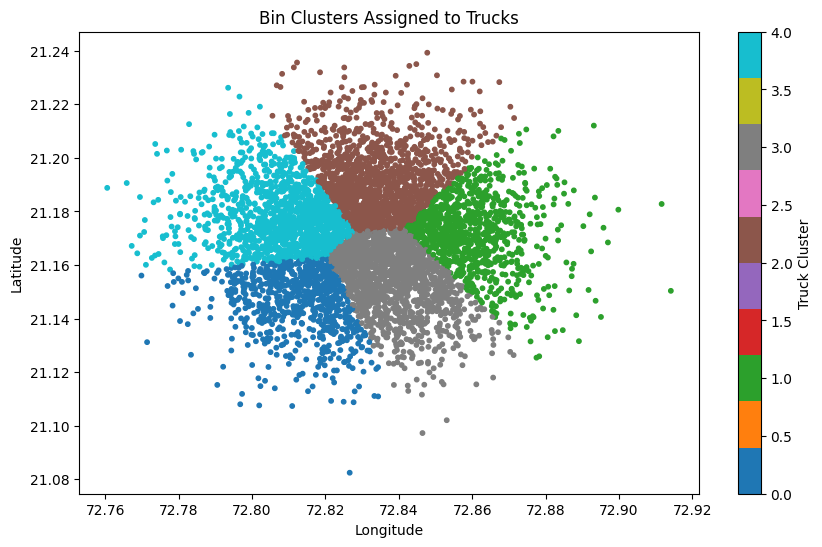

   Bin_ID   Latitude  Longitude  Fill_Level(%)  Truck_Assignment
0       1  21.176294  72.835602             80                 2
1       1  21.149400  72.830033             93                 3
2       1  21.185209  72.848381            100                 2
3       1  21.189011  72.843235            100                 2
4       2  21.131179  72.771384            100                 0
5       2  21.144156  72.842005            100                 3
6       2  21.172757  72.811030            100                 4
7       2  21.163875  72.802665            100                 4
8       3  21.169864  72.827331             72                 3
9       3  21.153139  72.839319             78                 3


In [156]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load bin dataset (should include Latitude, Longitude)
full_bins = pd.read_csv("smart_bin_dataset_with_location.csv")

# Number of trucks per area
num_trucks = 5

# Filter bins by area if needed, here example for full dataset
bins_to_cluster = full_bins[['Bin_ID', 'Latitude', 'Longitude', 'Fill_Level(%)']].copy()

# Prepare coordinates for clustering
coords = bins_to_cluster[['Latitude', 'Longitude']].values

# Perform KMeans clustering to assign bins to trucks
kmeans = KMeans(n_clusters=num_trucks, random_state=42)
clusters = kmeans.fit_predict(coords)

# Add cluster assignment to dataset
bins_to_cluster['Truck_Assignment'] = clusters

# Optional: plot clusters to check
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    bins_to_cluster['Longitude'], bins_to_cluster['Latitude'],
    c=bins_to_cluster['Truck_Assignment'], cmap='tab10', s=10
)
plt.colorbar(scatter, label='Truck Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bin Clusters Assigned to Trucks')
plt.show()

# Now bins_to_cluster has truck assignments to route routes independently
print(bins_to_cluster.head(10))


In [157]:
clean_distance_matrix(r"D:\project-II\distance_matrix_fullbins_2.csv")

NameError: name 'clean_distance_matrix' is not defined

In [158]:
clean_distance_matrix(r"D:\project-II\distance_matrix_fullbins_1.csv")
clean_distance_matrix(r"D:\project-II\distance_matrix_fullbins_0.csv")

NameError: name 'clean_distance_matrix' is not defined

In [86]:
for area, dist_matrix in distance_matrices.items():
    print(f"Checking duplicates for {area}...")
    print("Duplicate Columns:", dist_matrix.columns[dist_matrix.columns.duplicated()].tolist())
    print("Duplicate Rows:", dist_matrix.index[dist_matrix.index.duplicated()].tolist())
for area in distance_matrices:
    matrix = distance_matrices[area]
    cleaned = matrix.loc[:, ~matrix.columns.duplicated()]
    cleaned = cleaned.loc[~cleaned.index.duplicated(), :]
    distance_matrices[area] = cleaned

Checking duplicates for Residential...
Duplicate Columns: []
Duplicate Rows: []
Checking duplicates for Commercial...
Duplicate Columns: []
Duplicate Rows: []
Checking duplicates for Industrial...
Duplicate Columns: []
Duplicate Rows: []


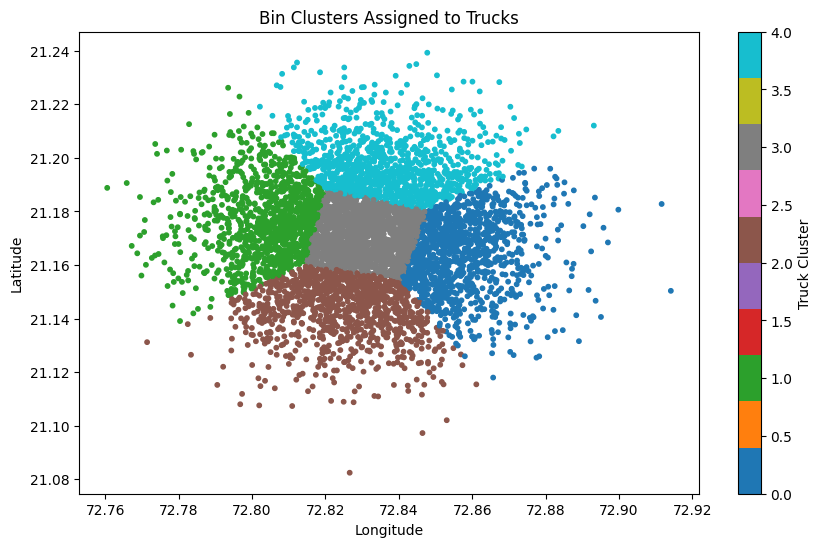


=== Trip 1 ===
🚛 Truck 3 collected 1000 fill from 10 bins
🚛 Truck 2 collected 1000 fill from 10 bins
🚛 Truck 4 collected 1000 fill from 10 bins
🚛 Truck 1 collected 1000 fill from 10 bins
🚛 Truck 0 collected 1000 fill from 10 bins
⏳ Remaining bins after trip 1: 2880

=== Trip 2 ===
🚛 Truck 3 collected 1000 fill from 10 bins
🚛 Truck 2 collected 1000 fill from 10 bins
🚛 Truck 4 collected 1000 fill from 10 bins
🚛 Truck 1 collected 1000 fill from 10 bins
🚛 Truck 0 collected 1000 fill from 10 bins
⏳ Remaining bins after trip 2: 600

=== Trip 3 ===
🚛 Truck 3 collected 1000 fill from 10 bins
🚛 Truck 2 collected 1000 fill from 10 bins
🚛 Truck 4 collected 1000 fill from 10 bins
🚛 Truck 1 collected 1000 fill from 10 bins
🚛 Truck 0 collected 1000 fill from 10 bins
⏳ Remaining bins after trip 3: 0

✅ Simulation completed. Results saved to bins_after_simulation.csv


In [160]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# -------------------------
# PARAMETERS
# -------------------------
truck_capacity = 1000        # Max truck capacity per trip
fill_increment_per_hour = 5  # Fill increase rate per hour
overflow_threshold = 100     # Max bin fill level (%)
time_step_hours = 1          # Simulation step = 1 hour
max_iterations = 5           # Max trips to simulate
num_trucks = 5               # Number of trucks for clustering
alpha, beta = 0.6, 0.4       # Weights for distance vs fill importance

# -------------------------
# STEP 1: Load dataset
# -------------------------
# Example dataset must include: Bin_ID, Latitude, Longitude, Fill_Level(%), Area_Type
full_bins = pd.read_csv("smart_bin_dataset_with_location.csv")

# -------------------------
# STEP 2: Cluster bins → Assign to trucks
# -------------------------
coords = full_bins[['Latitude', 'Longitude']].values
kmeans = KMeans(n_clusters=num_trucks, random_state=42, n_init=10)
clusters = kmeans.fit_predict(coords)

full_bins['Truck_Assignment'] = clusters

# Plot clusters for visualization
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    full_bins['Longitude'], full_bins['Latitude'],
    c=full_bins['Truck_Assignment'], cmap='tab10', s=10
)
plt.colorbar(scatter, label='Truck Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Bin Clusters Assigned to Trucks')
plt.show()

# -------------------------
# STEP 3: Dynamic Routing Simulation per Truck
# -------------------------
def simulate_trips_multi_truck(bins_state, distance_matrices, alpha, beta, max_iterations):
    """
    Simulates dynamic routing with multiple trucks, each restricted to its cluster.
    """
    uncollected_bins = bins_state[bins_state['Fill_Level(%)'] > 0].copy()
    trip_num = 0

    while not uncollected_bins.empty and trip_num < max_iterations:
        trip_num += 1
        print(f"\n=== Trip {trip_num} ===")

        for truck_id in bins_state['Truck_Assignment'].unique():
            truck_bins = uncollected_bins[uncollected_bins['Truck_Assignment'] == truck_id].copy()
            if truck_bins.empty:
                continue

            # --- Sort bins by fill level (priority) ---
            truck_bins = truck_bins.sort_values('Fill_Level(%)', ascending=False)

            trip_fill = 0
            collected_bins = []

            for _, bin_row in truck_bins.iterrows():
                if trip_fill + bin_row['Fill_Level(%)'] <= truck_capacity:
                    collected_bins.append(bin_row['Bin_ID'])
                    trip_fill += bin_row['Fill_Level(%)']
                else:
                    break

            # Update bins collected by this truck
            bins_state.loc[bins_state['Bin_ID'].isin(collected_bins), 'Fill_Level(%)'] = 0
            print(f"🚛 Truck {truck_id} collected {trip_fill} fill from {len(collected_bins)} bins")

        # --- Update fill levels for uncollected bins ---
        bins_state.loc[bins_state['Fill_Level(%)'] > 0, 'Fill_Level(%)'] = \
            np.minimum(overflow_threshold,
                       bins_state.loc[bins_state['Fill_Level(%)'] > 0, 'Fill_Level(%)'] +
                       fill_increment_per_hour * time_step_hours)

        uncollected_bins = bins_state[bins_state['Fill_Level(%)'] > 0].copy()
        print(f"⏳ Remaining bins after trip {trip_num}: {len(uncollected_bins)}")

    return bins_state


# -------------------------
# STEP 4: Run simulation
# -------------------------
# Distance matrices must already be computed per area (from Step-1 earlier)
distance_matrices = {
    "Residential": pd.read_csv("distance_matrix_fullbins_2_cleaned.csv", index_col=0),
    "Commercial": pd.read_csv("distance_matrix_fullbins_1_cleaned.csv", index_col=0),
    "Industrial": pd.read_csv("distance_matrix_fullbins_0_cleaned.csv", index_col=0),
}

bins_after_sim = simulate_trips_multi_truck(full_bins.copy(), distance_matrices, alpha, beta, max_iterations)

# -------------------------
# STEP 5: Save final bin state
# -------------------------
bins_after_sim.to_csv("bins_after_simulation.csv", index=False)
print("\n✅ Simulation completed. Results saved to bins_after_simulation.csv")


In [161]:
import joblib
import pandas as pd
from sklearn.cluster import KMeans

# Load your bin dataset
full_bins = pd.read_csv("smart_bin_dataset_with_location.csv")

# Train clustering model (example: 3 trucks)
kmeans = KMeans(n_clusters=3, random_state=42)
coords = full_bins[['Latitude', 'Longitude']].values
kmeans.fit(coords)

# Save model + dataset
joblib.dump(kmeans, "kmeans_model.pkl")
full_bins.to_csv("full_bins.csv", index=False)
print("✅ Model and dataset saved")


✅ Model and dataset saved
